# **ELTONJOHN OKETCH WEEK 6 (CORE) REGRESSION IP, WEEK 1 (MODULE 2)**

# **Prediction result of a game between team 1 and team 2 based on selected features.**

- You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

- Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

- Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# 1.) **Research Question**

# a.) Defining the question

-  I am set to predict the result between team 1 and team 2 based on who's home and who's away and on whether or not the game is friendly.(Rank should be included in the training)
- Using the polynomial approach, I should predict how many goals the home team scores using model 1 and predict how many goals the away team scores using model 2.
- I also need to use the Logistic approach to figure out from the home teams perspective if a game is a win, lose or a draw.

# b.) Defining metric for success

- My success as a football analyst will be determined by the ability to help Mchezopesa company predict game results and that will be assured when I adequately predict results between team 1 and team 2 based on the selected features and use two models within the polynomial approach to predict how many goals the home team and the away team scores whilst I use the logistic approach to figure out from the home teams perspective if a game is a win,lose or draw.

# c.) Understanding the context

- As a football analyst I am supposed to leverage the football data given to predict successful teams that will have rank reflective of their individual strengths. I am oblidged to use numerous approaches of machine learning techniques and data analysis procedures to come up with models that can predict how many goals a selected team scores and whether in their perspective the game was a win, lose or a draw.

# d.) Recording the experimental design


i.) Importing libraries necessary for analysis.

ii.) Reading the datasets.

iii.) Previewing datasets and their information.

iv.) Data cleaning procedures; checking and dealing with outliers and anomalies, imputing null values, deleting duplicates, converting columns into appropriate datatypes, checking and removing whitespaces and renaming column appropriately.

v.) Perform univariate and bivariate exploratory data analysis.

vi.)Perform any necessary feature engineering

vii.) Check for multicollinearity

viii.)Start building the models

ix.) Cross-validate the model

x.)Compute RMSE

xi.)Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
xii.)Perform appropriate regressions on the data including your justification

xii.)Challenge your solution by providing insights on how you can make improvements.

xiii.)Make conclusions based on findings

xiv.)Give recommendations.

# e.) Data Relevance

- For the entire analysis and prediction, we will leverage two datasets one that will have home and away classification alongside as to whether the game is friendly or not.This dataset will be relevant to answering the questions if it will be combined or merged with the fifa ranking of the teams. The data provide will meet the requirements necessary to analysisng and making prediction of game results.

# 2.) Reading the data

In [457]:
#Lets load relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# 2.1) Loading the datasets

In [458]:
#load the datasets
fifa = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')


# 3.) Checking the Data

In [459]:
# Preview the top of the fifa dataset
fifa.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [460]:
# Preview the bottom of the fifa dataset
fifa.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [461]:
# Preview the top of the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [462]:
# Preview the bottom of the results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [463]:
# Checking whether each column in fifa dataset has an appropriate datatype
#
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

- *Every column except for rank_date has the right datatype. This will be fixed during data cleaning of the merged dataset*

In [464]:
# Checking whether each column in results dataset has an appropriate datatype
#
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


- *Every column except for date has the right datatype in this dataset.The date column will be fixed during data cleaning of the merged dataset*

- Since we want to merge fifa and the results dataset we must identify which column we are going to merge them on and that column has to have similiraties in data. That column will be country, Therefore, we need to rename fifa country_full column into country to match the results column.

In [465]:
# Rename fifa's column to match the results column before merging.

fifa.rename(columns = {'country_full':'country','rank_date':'date' }, inplace = True)
fifa.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [466]:
fifa.shape

(57793, 16)

In [467]:
results.shape

(40839, 9)

In [468]:
# Lets now merge the two dataset so that we can get the home team rank column.

def merge(t1,t2):
    final = pd.merge(t1,t2, left_on= ['date','country'], right_on= ['date','home_team'], how='inner')
    return final

home_team = merge(fifa,results)
home_team.columns

Index(['rank', 'country_x', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country_y', 'neutral'],
      dtype='object')

- *The merged dataset has 24 columns.Some of which we don't really need so we might as well drop them now.*

In [469]:
# We then drop the unnecessary columns

home_team.drop(['country_x','rank_change','city','country_abrv','total_points','previous_points','rank_change',
               'cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted',
               'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg',
               'three_year_ago_weighted','confederation'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
home_team.rename({'country_y':'country'}, axis=1, inplace=True)

#Rename the rank to the home_team_rank
home_team.rename({'rank':'home_team_rank'}, axis=1, inplace=True)

home_team.head()

,home_team_rank,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False
1,35,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False
2,50,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Zimbabwe,False
3,59,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False
4,65,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False


In [470]:
# Again lets now merge the two dataset so that we can get the away team rank column.

def merge(t1,t2):
    final = pd.merge(t1,t2, left_on= ['date','country'], right_on= ['date','away_team'], how='inner')
    return final

away_team = merge(fifa,results)
away_team.columns

Index(['rank', 'country_x', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country_y', 'neutral'],
      dtype='object')

In [471]:
# We then drop the unnecessary columns

away_team.drop(['country_y','rank_change','city','country_abrv','total_points','previous_points','rank_change',
               'cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted',
               'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg',
               'three_year_ago_weighted','confederation'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
away_team.rename({'country_x':'country'}, axis=1, inplace=True)

#Rename the rank to the home_team_rank
away_team.rename({'rank':'away_team_rank'}, axis=1, inplace=True)

away_team.head()

,away_team_rank,country,date,home_team,away_team,home_score,away_score,tournament,neutral
0,5,Argentina,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
1,14,Mexico,1993-08-08,Brazil,Mexico,1,1,Friendly,False
2,19,Colombia,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,False
3,22,Uruguay,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False
4,86,Sierra Leone,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False


- Now we find a way to merge the two datasets on similar features

In [472]:
#Merging the two datasets

fifa_results = pd.merge(home_team, away_team, how = 'inner', left_on = ['date','away_team'],
                        right_on = ['date','away_team'])
#Now lets drop the duplicated values/the redundant columns
fifa_results.drop(['home_team_y','tournament_y','country_x','country_y','neutral_y',
                   'home_score_y','away_score_y'], axis=1, inplace=True)
# Rename fifa's column to match the results column before merging.
fifa_results.rename(columns = {'home_team_x':'home_team','home_score_x':'home_team_score',
                               'away_score_x':'away_team_score',
                       'tournament_x':'tournament_type','neutral_x':'neutral',}, inplace = True)
fifa_results.head()
                  


,home_team_rank,date,home_team,away_team,home_team_score,away_team_score,tournament_type,neutral,away_team_rank
0,8,1993-08-08,Brazil,Mexico,1,1,Friendly,False,14
1,35,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,94
2,59,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,22
3,65,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,86
4,67,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,5


In [473]:
#Lets check the datatype of the new dataset

fifa_results.dtypes

home_team_rank      int64
date               object
home_team          object
away_team          object
home_team_score     int64
away_team_score     int64
tournament_type    object
neutral              bool
away_team_rank      int64
dtype: object

- The column date has the wrong datatype.

In [474]:
# lets now try to make the dataset into a proper analyzible dataset by changing columns into the right datatype.


# First we convert date from object into datetime
fifa_results['date'] = pd.to_datetime(fifa_results['date'])
# Second we split the datetime to get individual years
fifa_results['year'] = fifa_results['date'].dt.year
# Then we drop the date column altogether
fifa_results.drop(['date'], axis = 1, inplace=True)
# We preview the new dataset
fifa_results.head()


,home_team_rank,home_team,away_team,home_team_score,away_team_score,tournament_type,neutral,away_team_rank,year
0,8,Brazil,Mexico,1,1,Friendly,False,14,1993
1,35,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,94,1993
2,59,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,22,1993
3,65,Guinea,Sierra Leone,1,0,Friendly,False,86,1993
4,67,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,5,1993


- Finally lets make the status column to track whether the game was a win, lose or a draw.

In [475]:
# Creating a new column showing the final result based on the scores
# The column has been created by subtracting the away score from the home score

fifa_results['score'] = fifa_results.home_team_score - fifa_results.away_team_score
fifa_results.head()

,home_team_rank,home_team,away_team,home_team_score,away_team_score,tournament_type,neutral,away_team_rank,year,score
0,8,Brazil,Mexico,1,1,Friendly,False,14,1993,0
1,35,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,94,1993,5
2,59,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,22,1993,2
3,65,Guinea,Sierra Leone,1,0,Friendly,False,86,1993,1
4,67,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,5,1993,-2


In [476]:
# Creating a function to generate the result to be used so as to create a win, draw 
# or lose column based on the home team

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the complete_merged_df
fifa_results['status'] = fifa_results.score.apply(lambda x: result(x))
# Dropping the score column
fifa_results.drop(['score','neutral'], axis = 1, inplace = True)
fifa_results.head()


,home_team_rank,home_team,away_team,home_team_score,away_team_score,tournament_type,away_team_rank,year,status
0,8,Brazil,Mexico,1,1,Friendly,14,1993,Draw
1,35,Ecuador,Venezuela,5,0,FIFA World Cup qualification,94,1993,Win
2,59,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22,1993,Win
3,65,Guinea,Sierra Leone,1,0,Friendly,86,1993,Win
4,67,Paraguay,Argentina,1,3,FIFA World Cup qualification,5,1993,Lose


- Lets finally re-order the column names in the order desired.

In [477]:
# We want to change or influence the order of the column names into a more user friendly order.
fifa_results = fifa_results[['home_team','away_team','home_team_score',
                             'away_team_score','year','home_team_rank','away_team_rank','tournament_type','status']]
fifa_results.head()

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw
1,Ecuador,Venezuela,5,0,1993,35,94,FIFA World Cup qualification,Win
2,Bolivia,Uruguay,3,1,1993,59,22,FIFA World Cup qualification,Win
3,Guinea,Sierra Leone,1,0,1993,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,1993,67,5,FIFA World Cup qualification,Lose


In [478]:
fifa_results.shape

(873, 9)

In [479]:
fifa_results.dtypes

home_team          object
away_team          object
home_team_score     int64
away_team_score     int64
year                int64
home_team_rank      int64
away_team_rank      int64
tournament_type    object
status             object
dtype: object

- The dataset and every column has the right datatype,now we may proceed.

In [480]:
fifa_results.head()

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw
1,Ecuador,Venezuela,5,0,1993,35,94,FIFA World Cup qualification,Win
2,Bolivia,Uruguay,3,1,1993,59,22,FIFA World Cup qualification,Win
3,Guinea,Sierra Leone,1,0,1993,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,1993,67,5,FIFA World Cup qualification,Lose


# 4.) External Data Source Validation

**4.1.) Validation**

- According to (https://www.fifa.com/fifa-world-ranking/men?dateId=id2) that is a table of fifa rankings. Brazil was indeed ranked number 8 as of  (8th August 1993) and mexico was also ranked at number 14, all that can be confirmed by checking that fifa table of years and ranking of the men's teams.

# 5.) Tidying the Dataset

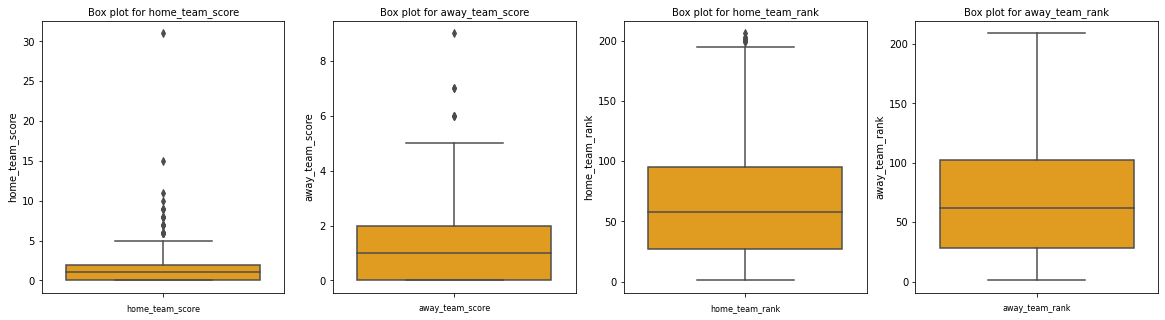

In [481]:
# Checking for Outliers
col_names = ['home_team_score','away_team_score','home_team_rank', 'away_team_rank']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(20,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = fifa_results[col_val], ax= ax[i],color = 'orange')
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


box(col_names)

In [482]:
# Checking for Anomalies
# quantiles

def quantiles(columns):
  for column in columns:
      Q1 = fifa_results[column].quantile(0.25)
      Q3 = fifa_results[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1={Q1},Q3={Q3}, IQR={IQR}, lowerbound={lb}, upperbound={ub}')

quantiles(col_names)



home_team_score : 
Q1=0.0,Q3=2.0, IQR=2.0, lowerbound=-3.0, upperbound=5.0
away_team_score : 
Q1=0.0,Q3=2.0, IQR=2.0, lowerbound=-3.0, upperbound=5.0
home_team_rank : 
Q1=27.0,Q3=95.0, IQR=68.0, lowerbound=-75.0, upperbound=197.0
away_team_rank : 
Q1=28.0,Q3=102.0, IQR=74.0, lowerbound=-83.0, upperbound=213.0


In [483]:
# Checking for Anomalies
#
fifa_results.duplicated().any()
# df_duplicates = df.drop_duplicates()
df= fifa_results[fifa_results.duplicated()]
df

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
232,Chile,Uzbekistan,2,0,2001,21,73,Millennium Cup,Win
234,Israel,Uzbekistan,2,0,2001,41,73,Friendly,Win


- These are not in actuality duplicated results because Chile and Israel are different Countries and different teams.

In [484]:
# Missing values
fifa_results.isnull().sum()

home_team          0
away_team          0
home_team_score    0
away_team_score    0
year               0
home_team_rank     0
away_team_rank     0
tournament_type    0
status             0
dtype: int64

- No missing values.

In [485]:
# More data cleaning procedures
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 872
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_team        873 non-null    object
 1   away_team        873 non-null    object
 2   home_team_score  873 non-null    int64 
 3   away_team_score  873 non-null    int64 
 4   year             873 non-null    int64 
 5   home_team_rank   873 non-null    int64 
 6   away_team_rank   873 non-null    int64 
 7   tournament_type  873 non-null    object
 8   status           873 non-null    object
dtypes: int64(5), object(4)
memory usage: 68.2+ KB


In [486]:
# Lets check categories in columns
fifa_results['tournament_type'].unique()

array(['Friendly', 'FIFA World Cup qualification', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'AFF Championship', 'UAFA Cup',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'EAFF Championship',
       'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

# 6.) **Exploratory Analysis (E.D.A)**

# a.) Univariate Analysis

In [487]:
#Summary statistics

fifa_results.describe()

,home_team_score,away_team_score,year,home_team_rank,away_team_rank
count,873.000000,873.000000,873.000000,873.000000,873.000000
mean,1.633448,1.002291,2004.781214,65.470790,69.925544
std,1.903854,1.154367,5.402727,47.534578,50.439924
min,0.000000,0.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,2000.000000,27.000000,28.000000
50%,1.000000,1.000000,2005.000000,58.000000,62.000000
75%,2.000000,2.000000,2010.000000,95.000000,102.000000
max,31.000000,9.000000,2018.000000,206.000000,209.000000


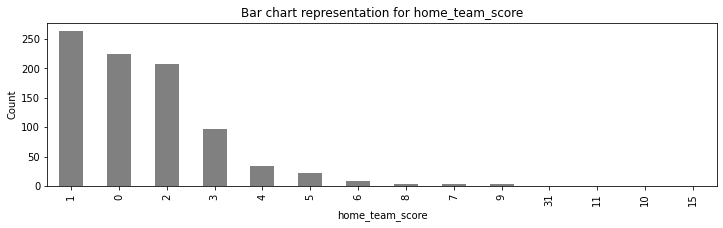

1     264
0     224
2     207
3      97
4      35
5      23
6       8
8       4
7       4
9       3
31      1
11      1
10      1
15      1
Name: home_team_score, dtype: int64

In [488]:
# Function to plot barchart
def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  fifa_results[column].value_counts().plot.bar(color= 'grey')
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

plotbar('home_team_score',(12,3))
# A Frequency table of Home team scores to back up the bar graph
fifa_results['home_team_score'].value_counts()

- We can now confirm that most home teams scored only one goal. But majority teams were between 0 to 2 goals for the home team games.

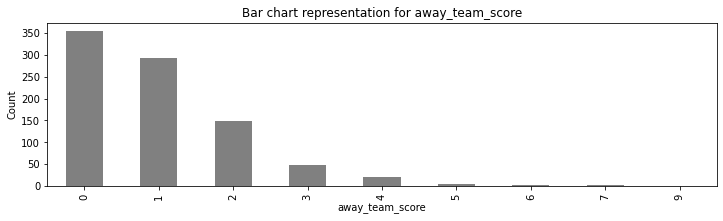

0    355
1    292
2    148
3     47
4     20
5      5
6      3
7      2
9      1
Name: away_team_score, dtype: int64

In [489]:
# A bar graph for Away_team_score
plotbar('away_team_score', (12,3))
# A Frequency table of away team scores to back up the bar graph
fifa_results['away_team_score'].value_counts()

- Most away teams ended up not scoring goals but majority of the away teams were distributed around scoring 0 to 2 goals.

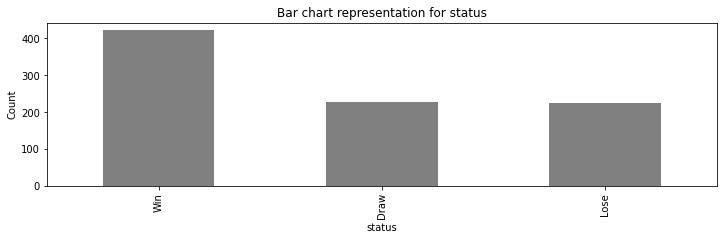

Win     422
Draw    226
Lose    225
Name: status, dtype: int64

In [490]:
# A bar graph for status
plotbar('status', (12,3))
# A Frequency table of status column to back up the bar graph
fifa_results['status'].value_counts()

- Since the win status is predicated upon the home team's perspective, we can then conclude that home teams generally won games, either due to high motivation or familiarity with the pitch.

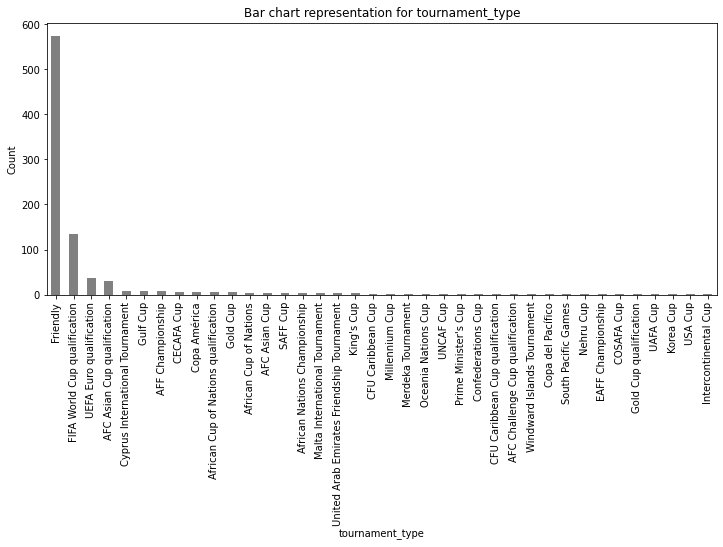

Friendly                                      575
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
CECAFA Cup                                      6
Copa América                                    6
African Cup of Nations qualification            5
Gold Cup                                        5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
African Nations Championship                    3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3
King's Cup                                      3
CFU Caribbean Cup                               2
Millennium Cup                                  2


In [491]:
# A bar graph for tournament_type
plotbar('tournament_type', (12,5))
# A Frequency table of tournament_type column to back up the bar graph
fifa_results['tournament_type'].value_counts()

- Most matches played were of the friendly tournament type.

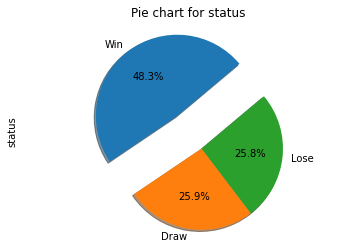

In [492]:
# Piechart Analysis

def pie(column, explode): 
    fifa_results[column].value_counts().plot.pie(autopct='%1.1f%%', explode = explode, shadow=True, startangle=40)
    plt.axis('equal')
    plt.title('Pie chart for {}'.format(column))
    return plt.show()

# Pie chart for status
pie('status', (0.5,0,0))

- Most home teams ended up winning their matches.

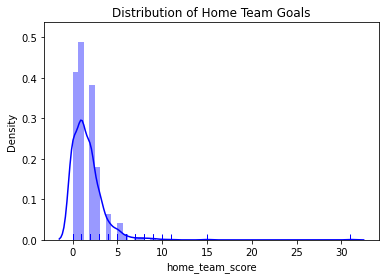

In [493]:
# A plot of the distribution of home team goals
plt.subplot()
sns.distplot(fifa_results[("home_team_score")],color="blue",rug=True)
plt.title("Distribution of Home Team Goals",color='black')
plt.show()

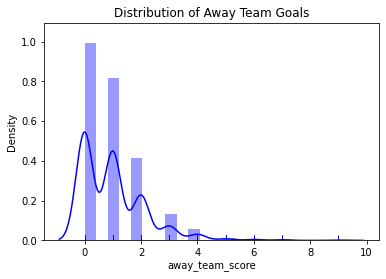

In [494]:
# A plot of the distribution of away team goals
plt.subplot()
sns.distplot(fifa_results[("away_team_score")],color="blue",rug=True)
plt.title("Distribution of Away Team Goals",color='black')
plt.show()

# b.) Bivariate Analysis.

a.) Numerical - Numerical

In [495]:
# Correlation between variables
fifa_results.corr()

,home_team_score,away_team_score,year,home_team_rank,away_team_rank
home_team_score,1.000000,-0.132677,-0.008363,-0.043672,0.309335
away_team_score,-0.132677,1.000000,-0.042947,0.144289,-0.151514
year,-0.008363,-0.042947,1.000000,0.213169,0.267779
home_team_rank,-0.043672,0.144289,0.213169,1.000000,0.534164
away_team_rank,0.309335,-0.151514,0.267779,0.534164,1.000000


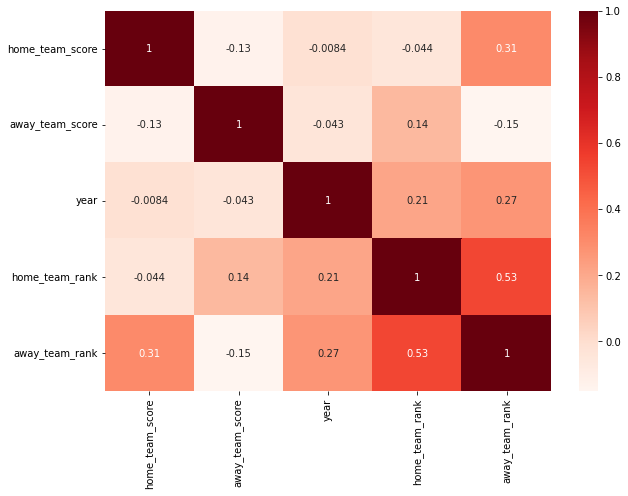

In [496]:
# Lets now plot a Heatmap to access the bivariate nature of the features' correlation- whether the two variables are correlated or not
#Using Pearson Correlation
plt.figure(figsize=(10,7))
cor = fifa_results.corr()
sns.heatmap(cor, annot=True, cmap='Reds')
plt.show()

- Most features in this dataset are either negative or weakly correlated or just not correlated at all.

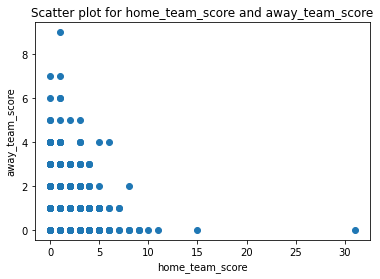

In [497]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(fifa_results[column1], fifa_results[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

plotscatter('home_team_score', 'away_team_score')

- There exists a low negative association between the two variables.

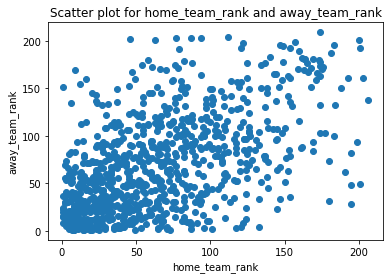

In [498]:
plotscatter('home_team_rank', 'away_team_rank')

- There exist no relationship between the two variables in question.

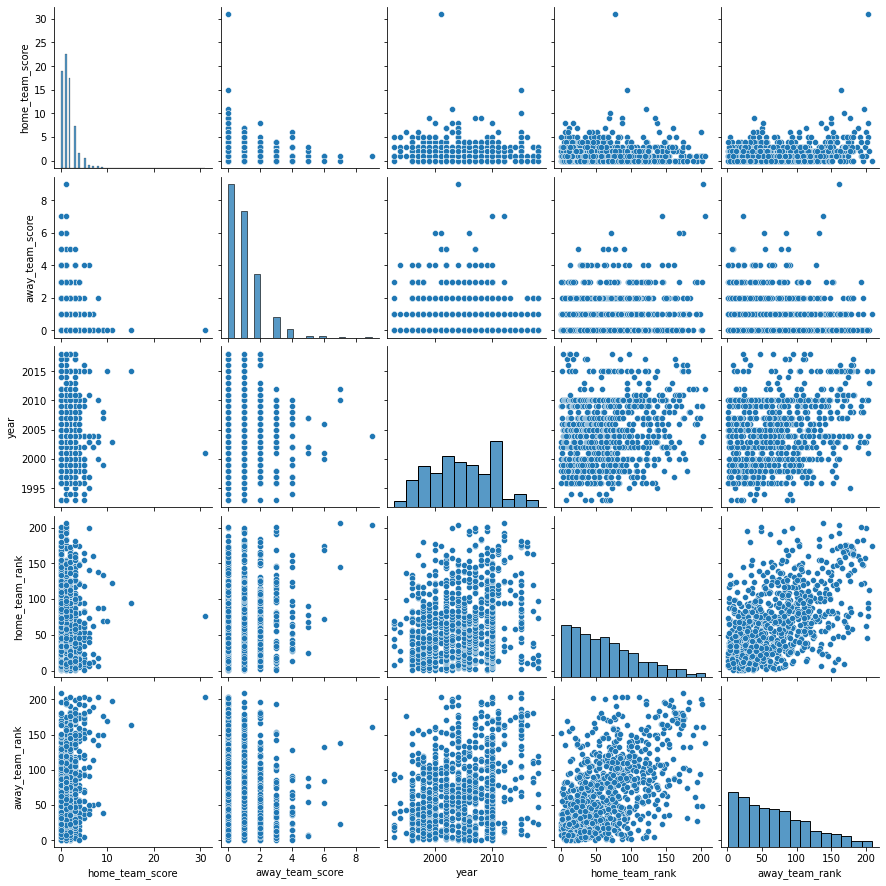

In [499]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(fifa_results)
plt.show()

b.) Categorical - Numerical

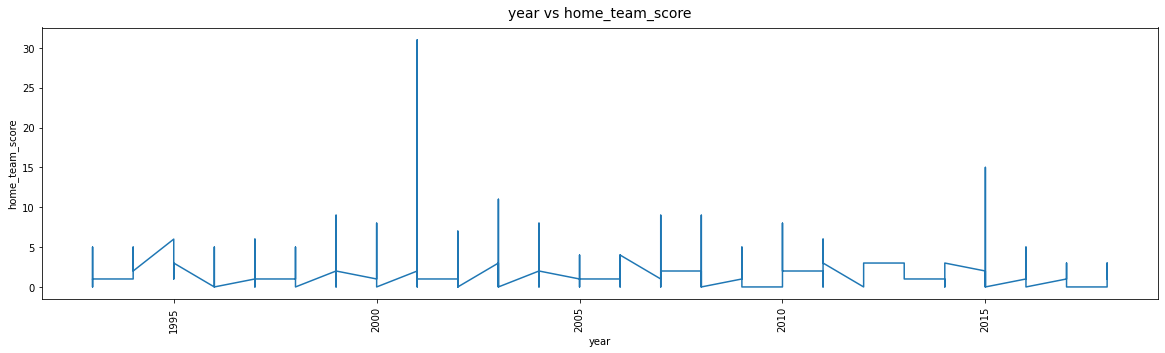

In [500]:
# Line graphs

def line(column1, column2, figsize):
    plt.figure(figsize = figsize)
    plt.plot(fifa_results[column1], fifa_results[column2])
    plt.xticks(rotation=90)
    plt.title("{} vs {}".format(column1, column2), fontsize=14, y=1.015)
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.show()

line('year', 'home_team_score', (20,5))

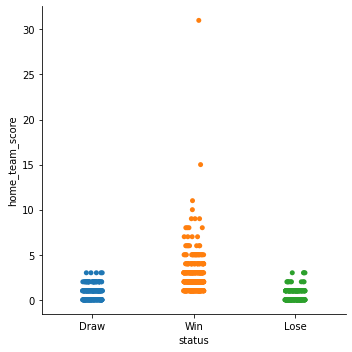

In [501]:
# A catplot of status vs the home team score
sns.catplot(x="status", y="home_team_score", data=fifa_results)

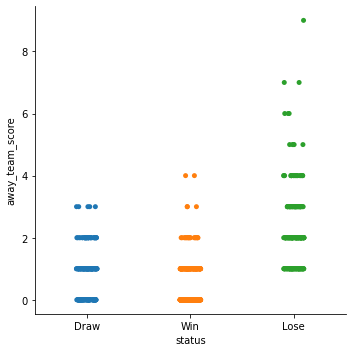

In [502]:
# A catplot of status vs the away team score
sns.catplot(x="status", y="away_team_score", data=fifa_results)


#7.) Implementing the Solution

# a.) **Polynomial Regression Models**

**I.) Feature Engineering**

In [503]:
#Importing our required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [504]:
# Genearting a column that tells us whether the tournament was a friendly , world Cup or Other for better analysis
def tournament(t):
    if t == 'Friendly':
        return 'Friendly'
    elif t == 'FIFA World Cup qualification':
        return 'World Cup'
    else:
        return 'Other'
      
fifa_results['tournament_type'] = fifa_results.tournament_type.apply(lambda i: tournament(i))
fifa_results['tournament_type'].unique()

array(['Friendly', 'World Cup', 'Other'], dtype=object)

- We want to reduce the number of classification within the Tournament type feature. We will engineer the feature into 3 possible classifications.

In [505]:
fifa_results['tournament_type'].value_counts()

Friendly     575
Other        164
World Cup    134
Name: tournament_type, dtype: int64

In [506]:
fifa_results.head()

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw
1,Ecuador,Venezuela,5,0,1993,35,94,World Cup,Win
2,Bolivia,Uruguay,3,1,1993,59,22,World Cup,Win
3,Guinea,Sierra Leone,1,0,1993,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,1993,67,5,World Cup,Lose


**ii.) Checking for Multicollinearity**

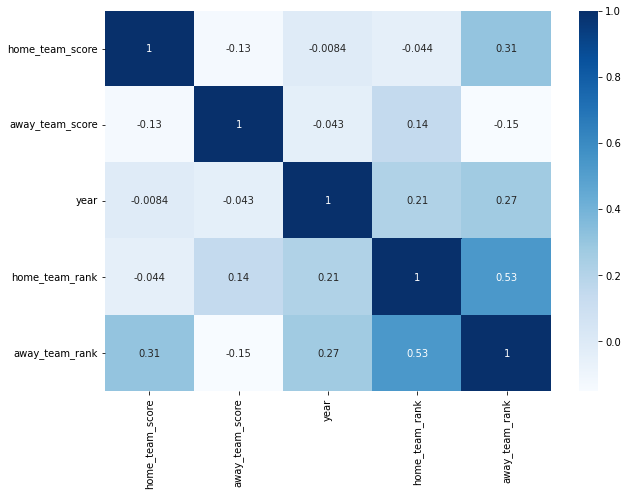

In [507]:
# First we Visualize the correlation using a heatmap
correlation = fifa_results.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True,cmap='Blues')
plt.show()

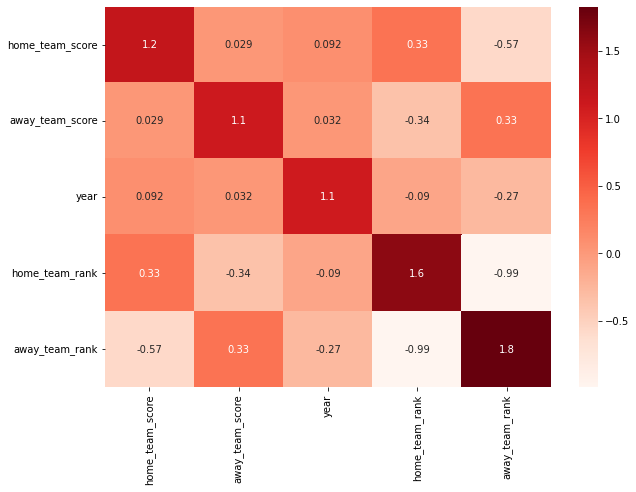

In [508]:
# Checking for collinearity using the VIF (Variation Inflation Factor)
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)
# Visualize the VIF using a heatmap
plt.subplots(figsize =  (10,7))
sns.heatmap(vif, annot = True, cmap = 'Reds')
plt.show()

- VIF scores along the downward sloping diagonal are normally placed hence there isnt a reason for concern as their values are placed under a VIF score of 2.These variables have no concerning levele of multicollinearity

**iii.) Building an optimal model**

In [509]:
# We first we highlight the dataset that we will use in our modelling
fifa_results.head()

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw
1,Ecuador,Venezuela,5,0,1993,35,94,World Cup,Win
2,Bolivia,Uruguay,3,1,1993,59,22,World Cup,Win
3,Guinea,Sierra Leone,1,0,1993,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,1993,67,5,World Cup,Lose


# 1.) Model 1: To predict how many goals the home team scores.

In [510]:
# Locating the columns we will use to create model 1
X = fifa_results.iloc[:, [5,6,7]]
y = fifa_results.home_team_score

In [511]:
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)

In [512]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [513]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [514]:
# Fit Linear Regression model to the dataset
# used to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression()

In [515]:
# Fit polynimoial regression model to the dataset
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression()

In [516]:
# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test poly series
y_pred = pol_regressor.predict(X_test_poly)

In [517]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
372       2   1.908447
676       1   1.771851
548       1   1.463623
293       2   1.566284
382       3   2.973999


,Actual,Predicted
count,175.000000,175.000000
mean,1.537143,1.608499
std,1.687528,0.738677
min,0.000000,-0.041626
25%,0.000000,1.328552
50%,1.000000,1.498657
75%,2.000000,1.713013
max,11.000000,5.480835


i) Computing RMSE

In [518]:
# We compute RMSE to see the Error rate

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9871595982142857
Mean Squared Error: 1.9059966581208365
Root Mean Squared Error: 1.380578378115794


- The RMSE is below the mean of the actual values therefore it might pass as a good model as the RMSE might pass as being low enough.

ii) Plotting residuals and accessing heteroscedasticity

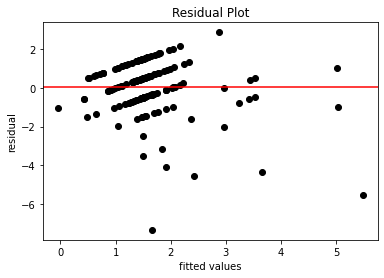

In [519]:
# Plotting the residuals 
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

-  Our residuals are centered around a mean, and there are no glaringly obvious patterns. to be thorough though lets perform a heteroscedasticity test.

 iii.) Bartlett's test

In [520]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

365.4576215703179
64.14379064080508
the variances are homogeneous!


iv) Cross validating the model

In [521]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Locating the columns we will use to create model 1
X = fifa_results.iloc[:, [5,6,7]]
y = fifa_results.home_team_score
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)
# USe of asupport vector Machine clasiifier with cross validation
clf = svm.SVC(kernel='linear', C=5).fit(X_train, y_train)
clf.score(X_test, y_test)


0.33969465648854963

# 2.) Model 2: To Predict the away score

In [522]:
# Locating the columns we will use to create model 1
X = fifa_results.iloc[:, [5,6,7]]
y = fifa_results.away_team_score

In [523]:
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)

In [524]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [525]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [526]:
# Fit Linear Regression model to the dataset
# used to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression()

In [527]:
# Fit polynimoial regression model to the dataset
poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression()

In [528]:
# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test poly series
y_pred = pol_regressor.predict(X_test_poly)

In [529]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
372       1   0.436604
676       1   0.765027
548       0   0.879517
293       5   0.833227
382       0   0.560588


,Actual,Predicted
count,262.000000,262.000000
mean,1.015267,0.999110
std,1.141248,0.346416
min,0.000000,-0.148394
25%,0.000000,0.778498
50%,1.000000,0.980220
75%,2.000000,1.221280
max,7.000000,1.965835


1.) computing the RMSE

In [530]:
# We compute RMSE to see the Error rate

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.841237467600559
Mean Squared Error: 1.1988878904199847
Root Mean Squared Error: 1.0949373910959406


- The RMSE is low but might not be low enough. Not exactly the perfect model to make those predictions.

ii.) Plotting residuals and accessing heteroscedasticity

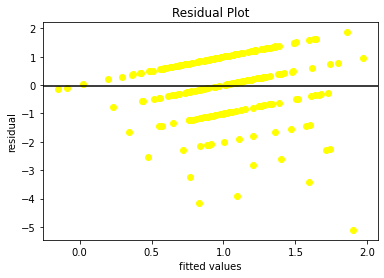

In [531]:
# Plotting the residuals 
residuals = y_pred - y_test

# Plotting the prediction errors using a residuals plot

plt.scatter(y_pred, residuals, color='yellow')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

-  Our residuals are centered around a mean, and there are no glaringly obvious patterns. to be thorough though lets perform a heteroscedasticity test.

iii.) Bartlett's test

In [532]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
288.91550201252716
the variances are homogeneous!


iv.) Crossvalidating the model


In [533]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Locating the columns we will use to create model 1
X = fifa_results.iloc[:, [5,6,7]]
y = fifa_results.away_team_score
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)
# USe of asupport vector Machine clasiifier with cross validation
clf = svm.SVC(kernel='linear', C=5).fit(X_train, y_train)
clf.score(X_test, y_test)


0.4122137404580153

# **b.) Logistic Regression Model**

*Model : Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D))*

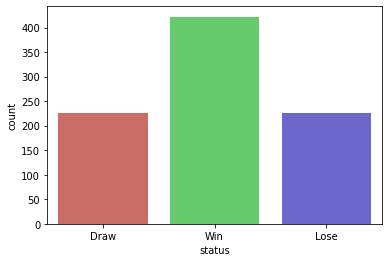

In [534]:
# Checking categories of our target variable
# Since we are building a model to predict whether a game has been won or not
# 
import seaborn as sb
sb.countplot(x='status',data=fifa_results, palette='hls')

In [535]:
fifa_results.head(2)

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw
1,Ecuador,Venezuela,5,0,1993,35,94,World Cup,Win


In [536]:
# Locating the columns we will use since we have been told only to use the home teams perspective

X = fifa_results.iloc[:, [2,3,5,6,7]]
y = fifa_results.status

In [537]:
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)

In [538]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [539]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [540]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [541]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [542]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[51,  0,  0],
       [ 0, 45,  0],
       [ 0,  0, 79]])

In [543]:
# Measuring the accuracy of the model using the accuracy_score function
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})

The accuracy of the model is {1.0}


- The Logistic regression model achieved an accuracy of 100% accuracy in terms of its predictions. No more improvements should be made.

# 8.0) Challenging the Solution

i.) Training an optimal classifier.

In [544]:
fifa_results.head(1)

,home_team,away_team,home_team_score,away_team_score,year,home_team_rank,away_team_rank,tournament_type,status
0,Brazil,Mexico,1,1,1993,8,14,Friendly,Draw


In [545]:
# feature selection
X = fifa_results.iloc[:, [2,3,5,6,7]]
y = fifa_results.status

In [546]:
# Encoding the categorical variables using the get dummies function 
X = pd.get_dummies(X, drop_first=True)

In [547]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [548]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [549]:
#I decide to use the RandomforestClassification model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [550]:
# I did the Training and Cross Validation
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used.
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [551]:
# Printing the accuracies returned for ten folds 
print(all_accuracies.mean())

0.9914078674948241


- *The RAndomForest classification model had an accuracy of 99.2% that means the solution we had gotten of 100% accuracy using the Logistic regression model was highly optimal.*

# 9.) **Follow up questions**

- All the questions we had defined have been answered usinfg the availed data. Therefore there is no need of further data to answer the defined questions

a). **Did we have the right data?**

- Yes we did have the right data to full answer and make football analysis and predictions as required.

b). **Do we need other data to answer our question?**

- No, we require no additional data as all the questions have been answered and the necessary predictions have been made.

c). **Did we have the right question?**

- Yes we did, the questions defined led to a very thourough yet vigourous exercise of making prediction using various machine learning techniques.The accuracy of each test was measured and accounted for.